In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import sample
from scipy.special import expit, logit

A post from Allen Downey addressed the decline of homophobia as seen in the General Social Survey. He says that this is caused by both a 'cohort effect' and a 'period effect'. This notebook will look at the evidence of this more closely with both frequentist and bayesian models.

There are four questions in the General Social Survey related to homosexuality. They are:
1. What about sexual relations between two adults of the same sex--do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?
2. Suppose this admitted homosexual wanted to make a speech in your community. Should he be allowed to speak, or not?
3. Should such a person be allowed to teach in a college or university, or not?
4. If some people in your community suggested that a book he wrote in favor of homosexuality should be taken out of your public library, would you favor removing this book, or not?

Variables are recoded to binary variables to follow a Downey's analysis. All answers that are not "Not wrong at all" or "Allowed" are coded as homophobic responses. Year of birth and 'cohort' are calculated from the year of the survey and age of the respondent. 

In [3]:
df = pd.read_csv("gss.csv")

In [4]:
#recode homosexual relations wrong into binary
df['homo_wrong'] = np.select([(df['HOMOSEX']<4), (df['HOMOSEX']==4)],[1,0], default=np.nan)
#recode spkhomo - 1 = not allowed to speak 
df['homo_spk'] = np.select([(df['SPKHOMO']==2), (df['SPKHOMO']==1)], [1,0], default=np.nan)
#recode colhomo - 1 = not allowed to teach
df['homo_teach'] = np.select([(df['COLHOMO']==5), (df['COLHOMO']==4)], [1,0], default=np.nan)
#recode libhomo - 1 = remove book in favor of homosexuality 
df['homo_book'] = np.select([(df['LIBHOMO']==1), (df['LIBHOMO']==2)], [1,0], default=np.nan)
#negative answers for age are invalid 
df['yob'] = np.where(df.AGE<0, np.nan, df['YEAR'] - df['AGE'])
df['birth_decade'] = np.where(df.AGE<0, np.nan,(np.floor(df['yob']/10) * 10))
#set start to 0
df['birth_decade_sc'] = df['birth_decade'] - 1880
df['year_sc'] = df['YEAR'] - 1973
df = df[df.AGE>0]

pol_conditions = [((df['PARTYID']==1)|(df['PARTYID']==0)),
                   ((df['PARTYID']==5)|(df['PARTYID']==6)),
                   ((df['PARTYID']==2)|(df['PARTYID']==3)|(df['PARTYID']==4))]
pol_recodes = ['democrat','republican','independent']
df['pol'] = np.select(pol_conditions, pol_recodes, default=None)
df=df[df.homo_wrong.notna()]
df=df[df.birth_decade.notna()]

It appears that homophobic responses have consistently been decreasing over the years. The 'cohort effect' refers to older generations with homophobic attitudes being replaced by younger liberal generations, and the 'period effect' refers to people of all generations becoming more accepting over time. Responses to the first question will be examined more closely.

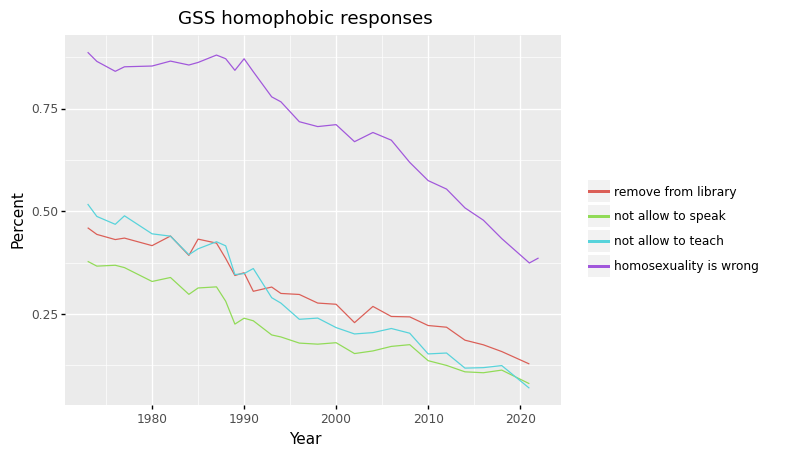

<ggplot: (1450077488927)>

In [5]:
year_avg = df.groupby('YEAR')[['homo_wrong','homo_spk','homo_teach','homo_book']].mean().reset_index()
year_avg_long = pd.melt(year_avg, id_vars=['YEAR'], value_vars=['homo_wrong','homo_spk','homo_teach','homo_book'])
(ggplot(year_avg_long) 
 + aes(x='YEAR', y='value', group='variable', color='variable') 
 + geom_line()
 + scale_color_discrete(labels = ['remove from library', 'not allow to speak', 'not allow to teach', 'homosexuality is wrong'])
 + xlab('Year')
 + ylab('Percent')
 + labs(color = '', title='GSS homophobic responses')) 

### Cohort Effect
Following Downey's analysis, respondents are grouped by birth decade, and responses from each cohort from each year of the survey are plotted below with lowess smoothing function. It shows that younger cohorts are less likely to give homophobic responses. We can also see that each cohort gives fewer homophobic responses over time. 

/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning:

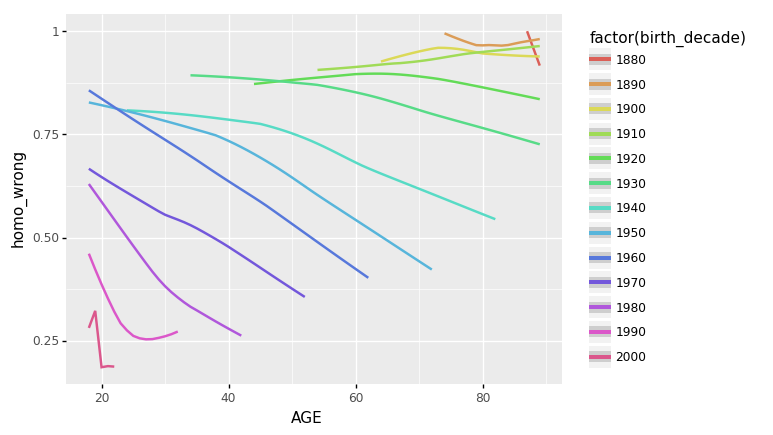

<ggplot: (1450074650106)>

In [6]:
cohorts = df.groupby(['birth_decade', 'AGE'])['homo_wrong'].agg(['mean','count']).reset_index().rename(columns={'mean':'homo_wrong'})
(ggplot(cohorts[cohorts['count']>5])
 +aes(x='AGE', y='homo_wrong', color='factor(birth_decade)')
 +geom_smooth(method='lowess'))

### Period Effect
Also following Downey's analysis, we can see the period effect below. 

/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning:

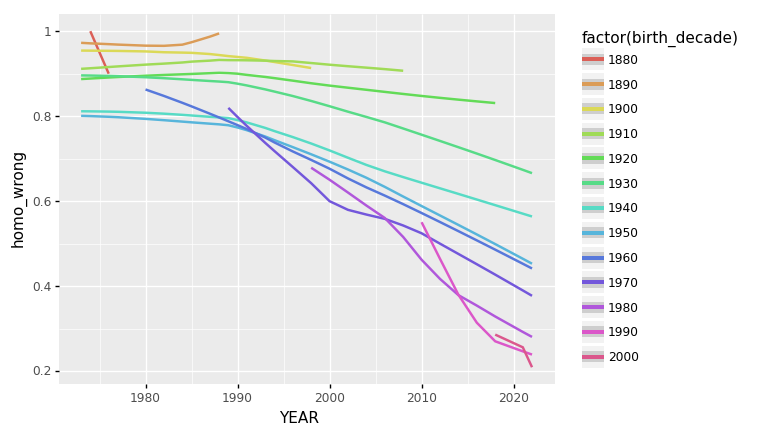

<ggplot: (1450077713881)>

In [7]:
cohorts = df.groupby(['birth_decade', 'YEAR'])['homo_wrong'].agg(['mean','count']).reset_index().rename(columns={'mean':'homo_wrong'})
(ggplot(cohorts[cohorts['count']>5])
 +aes(x='YEAR', y='homo_wrong', color='factor(birth_decade)')
 +geom_smooth(method='lowess'))

/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning:

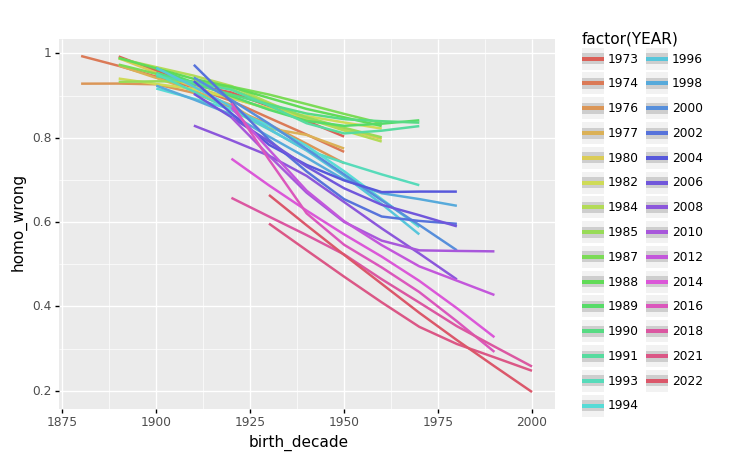

<ggplot: (1450074625082)>

In [8]:
cohorts = df.groupby(['birth_decade', 'YEAR'])['homo_wrong'].agg(['mean','count']).reset_index().rename(columns={'mean':'homo_wrong'})
(ggplot(cohorts[cohorts['count']>5])
 +aes(x='birth_decade', y='homo_wrong', color='factor(YEAR)')
 +geom_smooth(method='lowess'))

### Models
It is unclear how Downey set up his model, but for simplicity I will use a logistic regression here using decade of birth and year of survey as linear predictors.

In [235]:
import statsmodels.formula.api as smf
l1 = smf.logit("homo_wrong ~ year_sc + birth_decade_sc", data=df).fit()
l1.summary()

Optimization terminated successfully.
         Current function value: 0.528367
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             homo_wrong   No. Observations:                42106
Model:                          Logit   Df Residuals:                    42103
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Sep 2023   Pseudo R-squ.:                  0.1366
Time:                        21:20:19   Log-Likelihood:                -22247.
converged:                       True   LL-Null:                       -25766.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5838      0.045     79.583      0.000       3.496       3.672
year_sc            -0.0362      0.001    -38.096      0.000      -0.038      -0.034
birth_decade_sc    -0.0252      0.001    -36.356      0.000      -0.027      -0.024
===================================================================================
"""

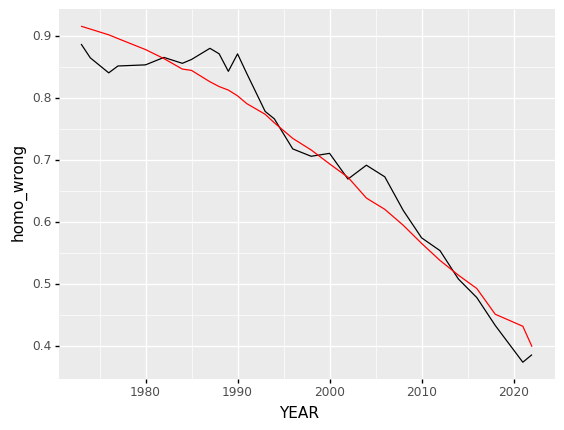

<ggplot: (1450066432025)>

In [236]:
df['pred1'] = l1.predict(df)
plot_df = df.groupby(['YEAR','year_sc'])[['pred1','homo_wrong']].mean().reset_index()
(ggplot(plot_df) 
+ aes(x='YEAR') 
+ geom_line(aes(y='homo_wrong'))
+ geom_line(aes(y='pred1'), color='red')

One of the interesting point Downey made was that there seems to be a change at 1990. The trend declined slowly up to 1990 and much faster afterwards. Just looking at the plot it appears that way, but I will see if the data actually supports this. Here I will use a Bayesian framework using pymc. I am specifying the model as follows:

Like the original model there will be an intercept, a coefficient for birth decade, and a coefficient for year. I will set the prior for the intercept as Normal(mu=0, tau=0.01), coefficient for birth decade Normal(mu=0, tau=1). I will do a piecewise regression, having two different gradients for year variable. The prior for the first will be Normal(mu=0,tau=1), which is the trend before 1990. The prior for the second will be the same except bound to be negative. I will not set the switchpoint directly as 1990, I will let the model decide when the gradient switches. The prior for this switchpoint will be uniform but bound to a window near 1990. 

All of this will be used for the likelihood for a Bernoulli rv to model the outcome.

In [237]:
with pm.Model() as logit_model:
    x1 = pm.MutableData("x1", df.birth_decade_sc)
    x2 = pm.MutableData("x2", df.year_sc)
    y = pm.MutableData('y', df.homo_wrong)
    beta_0 = pm.Normal('beta_0', mu=0, tau=0.01)
    beta_1 = pm.Normal('beta_1', mu=0, tau=1)
    beta_2_1 = pm.Normal('beta_2_1', mu=0, tau=1)
    beta_2_2 = pm.Bound('beta_2_2',pm.Normal.dist(mu=0,tau=1), upper=0.0)
    
    bp = pm.DiscreteUniform("bp", lower=12, upper=23, initval=17)
    beta_2 = pm.math.switch(x2>bp, beta_2_2, beta_2_1)
    
    p = pm.invlogit(beta_0 + beta_1*x1 + beta_2*x2)

    observations = pm.Bernoulli("observed", p, observed=y)
    trace = pm.sample(2000,chains=6, return_inferencedata=True, cores=6)
pm.summary(trace)



/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/distributions/bound.py:185: FutureWarning: Bound has been deprecated in favor of Truncated, and will be removed in a future release. If Truncated is not an option, Bound can be implemented byadding an IntervalTransform between lower and upper to a continuous variable. A Potential that returns negative infinity for values outside of the bounds can be used for discrete variables.
Multiprocess sampling (6 chains in 6 jobs)
CompoundStep
>NUTS: [beta_0, beta_1, beta_2_1, beta_2_2]
>Metropolis: [bp]
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp


/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp


/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
/home/el1847/.conda/envs/txt-env/lib/python3.8/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
Sampling 6 chains for 1_000 tune and 2_000 draw iterations (6_000 + 12_000 draws total) took 315 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,3.344,0.050,3.248,3.437,0.001,0.000,5355.0,5239.0,1.0
beta_1,-0.025,0.001,-0.027,-0.024,0.000,0.000,5445.0,5641.0,1.0
beta_2_1,-0.002,0.003,-0.009,0.004,0.000,0.000,5620.0,5779.0,1.0
bp,18.504,0.500,18.000,19.000,0.009,0.006,3097.0,3097.0,1.0
beta_2_2,-0.030,0.001,-0.032,-0.028,0.000,0.000,5599.0,6287.0,1.0


The posteriors are in line with the coefficients of the original model. Taking the means of the posteriors as point estimates, the coefficient for birth decade is the same, and the interceipt is a little lower. The first coefficient for year is much smaller, while the second coefficient is closer to the one in the frequentist model. The samples for the switchpoint appear to be at 1991 or 1992 instead of 1990. The distributions are plotted here:

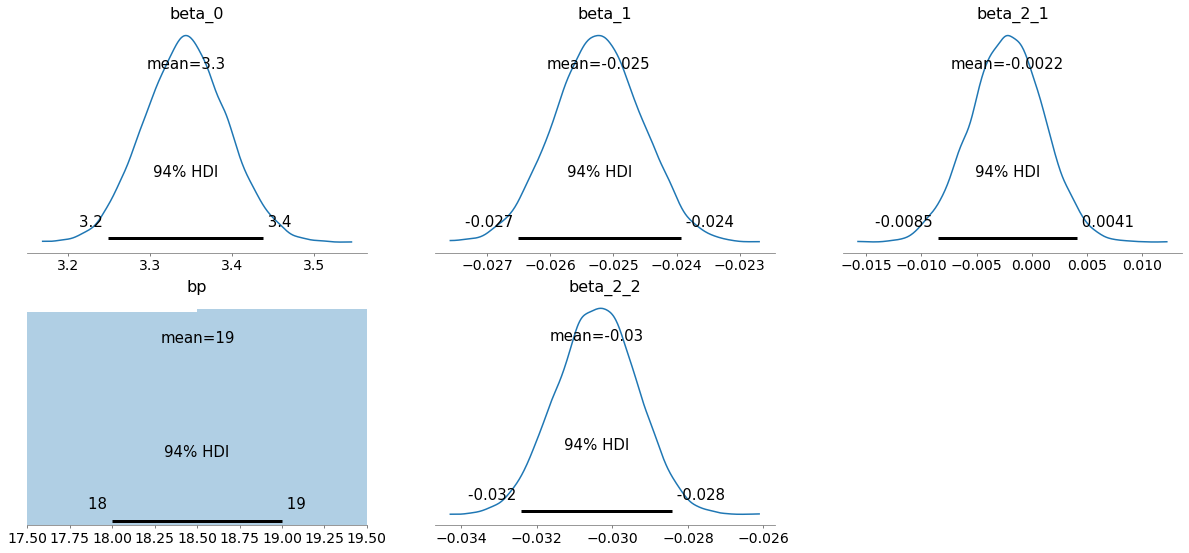

In [238]:
az.plot_posterior(trace)
plt.show()


In [239]:
with logit_model:
   post_predictions = pm.sample_posterior_predictive(
        trace,
        return_inferencedata=True,
        extend_inferencedata=True
    )
    

Sampling: [observed]


In [240]:
def separation_plot( p, y, **kwargs ):
    """
    This function creates a separation plot for logistic and probit classification. 
    See https://onlinelibrary.wiley.com/doi/10.1111/j.1540-5907.2011.00525.x
    
    p: The proportions/probabilities, can be a nxM matrix which represents M models.
    y: the 0-1 response variables.
    
    """    
    assert p.shape[0] == y.shape[0], "p.shape[0] != y.shape[0]"
    n = p.shape[0]

    try:
        M = p.shape[1]
    except:
        p = p.reshape( n, 1 )
        M = p.shape[1]

    colors_bmh = np.array( ["#eeeeee", "#348ABD"] )


    fig = plt.figure( )
    
    for i in range(M):
        ax = fig.add_subplot(M, 1, i+1)
        ix = np.argsort( p[:,i] )
        #plot the different bars
        bars = ax.bar( np.arange(n), np.ones(n), width=1.,
                color = colors_bmh[ y[ix].astype(int) ], 
                edgecolor = 'none')
        ax.plot( np.arange(n+1), np.append(p[ix,i], p[ix,i][-1]), "k",
                 linewidth = 1.,drawstyle="steps-post" )
        #create expected value bar.
        ax.vlines( [(1-p[ix,i]).sum()], [0], [1] )
        plt.xlim( 0, n)
        
    plt.tight_layout()
    
    return
    

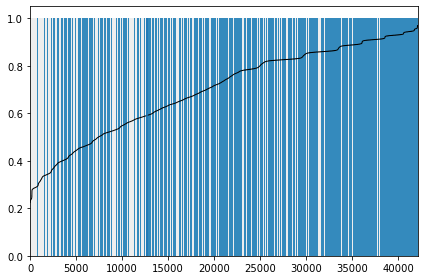

In [242]:
separation_plot(np.concatenate(post_predictions.posterior_predictive.observed.data).mean(axis=0), post_predictions.observed_data.observed.data)
plt.show()

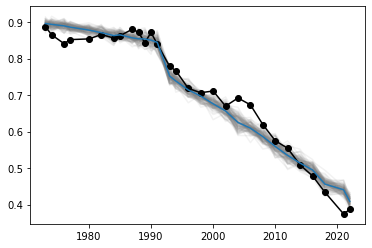

In [244]:
### How does this fit with the original data?
df['pred_means'] = np.concatenate(post_predictions.posterior_predictive.observed.data).mean(axis=0)
group_years = df.groupby('YEAR')[['homo_wrong','pred_means']].mean().reset_index()
for i in sample(range(np.concatenate(post_predictions.posterior_predictive.observed.data).shape[0]), k=100):
    df['pp'] = np.concatenate(post_predictions.posterior_predictive.observed.data)[i,]
    tmp_yrs = df.groupby("YEAR")[['pp']].mean().reset_index()
    plt.plot(tmp_yrs.YEAR, tmp_yrs.pp, color='gray', alpha=0.1)
plt.plot(group_years.YEAR, group_years.homo_wrong, color='black', marker='o')
plt.plot(group_years.YEAR, group_years.pred_means, color='C0')
plt.show()

We can see the model captures the change in trend quite well. The red line shows the mean of the posterior predictive samples, while the gray lines are individual samples. Taking a step back though, although the model fits the trend well, it isn't clear whether the period and cohort effects are separated correctly, as they are so correlated. Not to mention, the model has completely ignored age, which again is directly tied to the period and cohort. By not including it, we are actually placing the strong assumption that all effects are due to period and cohort and not age. 


### Multilevel Models!
Since we're making assumptions already, we can add more assumptions in the way the model is structured. For instance, a multilevel model can be used to consider the cohort effect as a random effect as opposed to a linear one. Since cohort is already a grouping variable, this could make sense to do. Following literature on APC models, it including one of the variables as a polynomial instead of a linear predictor also makes it easier to fit.

In [9]:
dd = dict(zip(df['year_sc'].unique(), list(range(29))))

dict_items([(0, 0), (1, 1), (3, 2), (4, 3), (7, 4), (9, 5), (11, 6), (12, 7), (14, 8), (15, 9), (16, 10), (17, 11), (18, 12), (20, 13), (21, 14), (23, 15), (25, 16), (27, 17), (29, 18), (31, 19), (33, 20), (35, 21), (37, 22), (39, 23), (41, 24), (43, 25), (45, 26), (48, 27), (49, 28)])

In [212]:
X = df[['year_sc']]
X ['year_sc_2'] = df['year_sc']**2
#X['Intercept'] = 1
y = df['homo_wrong']

cohort_cat = (df['birth_decade_sc']/10).astype('int')
year = df['year_sc'].astype('int').map(dd)
X['cohort_cat'] = cohort_cat
X['year'] = year
with pm.Model() as model:
    # Fixed effects
    beta1_ = pm.HalfNormal('beta1', sigma=0.001)
    beta1 = pm.Deterministic('b1_', -beta1_)
    beta2_ = pm.HalfNormal('beta2_', sigma=0.001)
    beta2 = pm.Deterministic('beta2', -beta2_)

    # Random effect
    sig_cohort = pm.Exponential('sig_cohort', 1)
    alpha_cohort = pm.Normal('alpha_cohort', 0, sig_cohort, shape=len(cohort_cat.unique()))
 
    nu = pm.math.dot(X.iloc[:,0].values, beta1) + pm.math.dot(X.iloc[:,1].values, beta2) + alpha_cohort[cohort_cat.values] #+ alpha_year[year.values]
    
    p = pm.invlogit(nu)
    
    # Likelihood
    likelihood = pm.Bernoulli('likelihood', p=p, observed=y)
    
    
    prior_samples = pm.sample_prior_predictive(samples=1000)
    

/tmp/ipykernel_680138/749750229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Sampling: [alpha_cohort, beta1, beta2_, likelihood, sig_cohort]


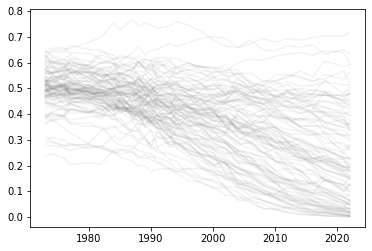

In [213]:
#checking priors to see if they make sense
priors_p = np.concatenate(prior_samples.prior_predictive.likelihood.data)
for i in sample(range(priors_p.shape[0]), k=100):
    df['priorp'] =  priors_p[i,]
    tmp_yrs = df.groupby("YEAR")[['priorp']].mean().reset_index()
    plt.plot(tmp_yrs.YEAR, tmp_yrs.priorp, color='gray', alpha=0.1)
plt.show()

In [214]:
with model:
    trace = pm.sample(2000, tune=2000, target_accept=0.95)
    postp = pm.sample_posterior_predictive(
        trace,
        return_inferencedata=True,
        extend_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta1, beta2_, sig_cohort, alpha_cohort]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 432 seconds.
Sampling: [likelihood]


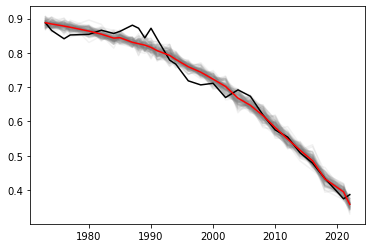

In [216]:
post_p = np.concatenate(postp.posterior_predictive.likelihood.data)
for i in sample(range(post_p.shape[0]), k=100):
    df['postp'] =  post_p[i,]
    tmp_yrs = df.groupby("YEAR")[['postp']].mean().reset_index()
    plt.plot(tmp_yrs.YEAR, tmp_yrs.postp, color='gray', alpha=0.1)
df['postp_means'] = post_p.mean(axis=0)
dfgrouped = df.groupby('YEAR')[['postp_means','homo_wrong']].mean().reset_index()
plt.plot(dfgrouped.YEAR, dfgrouped.homo_wrong, color = 'black')
plt.plot(dfgrouped.YEAR,dfgrouped.postp_means, color='red')
plt.show()

In [218]:
cohort_samples = np.concatenate(trace.posterior.alpha_cohort.data)
b1_samples = np.concatenate(trace.posterior.beta1.data)
b2_samples = np.concatenate(trace.posterior.beta2.data)



In [225]:
counter_years = X.groupby(['year','year_sc','year_sc_2']).count().reset_index().drop(columns=['cohort_cat'])

We can try to separate the cohort and period effects by generating counterfactuals. The first scenario will be as if the people in the very first cohort were surveyed again at different points, thus there would be no difference in cohort or generation, leaving only the effect of time. We can see the period effect brings percentage of homophobic responses down to somewhere between 60-70%.

In [227]:
counterfactual = X[X.year==0]
y0 = X[X.year==0]
for i in range(1,29):
    c_i = y0.copy()
    c_i['year'] = counter_years.loc[i]['year']
    c_i['year_sc'] = counter_years.loc[i]['year_sc']
    c_i['year_sc_2'] = counter_years.loc[i]['year_sc_2']
    counterfactual = pd.concat([counterfactual, c_i], ignore_index=True)
cohort_means = cohort_samples.mean(axis=0)
counter_ys = np.zeros((100, counterfactual.shape[0]))
sample_indices = sample(range(b1_samples.shape[0]), k=100)
for i, j in enumerate(sample_indices):
    lin_pred = b1_samples[j] * counterfactual['year_sc'] + b2_samples[j] * counterfactual['year_sc_2'] + cohort_means[counterfactual.cohort_cat] #+ y_alpha_samples[j][counterfactual.year]
    prob = expit(lin_pred)
    counter_ys[i] = np.random.binomial(n=1,p=prob)
counterfactual['YEAR'] = counterfactual['year_sc']+1973

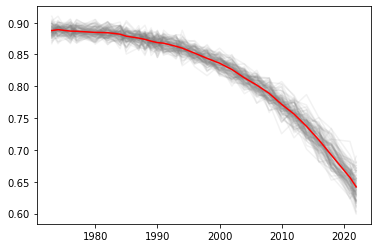

In [228]:
#counterfactual if the same cohort surveyed every year, showing period effect only
for i in range(counter_ys.shape[0]):
    counterfactual['pp'] = counter_ys[i]
    tmp_ = counterfactual.groupby('YEAR')['pp'].mean().reset_index()

    plt.plot(tmp_.YEAR, tmp_.pp, color='gray', alpha=0.1)
counterfactual['pp_mean'] = counter_ys.mean(axis=0)
cgrouped = counterfactual.groupby('YEAR')['pp_mean'].mean().reset_index()
plt.plot(cgrouped.YEAR, cgrouped.pp_mean, color='red')
plt.show()


The second counterfactual will simulate a scenario where there are only cohort effects. Thus responses change because older generations are being replaced. The period effect is taken out of the linear predictor to generate these counterfactuals. Below, we see that homophobic responses only drop to the seventies. 

In [229]:
#counterfactual if there was no period effect
counterfactual2 = X
counterfactual2['YEAR'] = df['YEAR']
counterfactual2['year'] = 0
counterfactual2['year_sc'] = 0
counterfactual2['year_sc_2'] = 0
counter_ys2 = np.zeros((100, counterfactual2.shape[0]))
for i, j in enumerate(sample_indices):
    lin_pred = cohort_means[counterfactual2.cohort_cat] 
    prob = expit(lin_pred)
    counter_ys2[i] = np.random.binomial(n=1,p=prob)

/tmp/ipykernel_680138/4179554437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_680138/4179554437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_680138/4179554437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_6801

/tmp/ipykernel_680138/2740291183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_680138/2740291183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_680138/2740291183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_6801

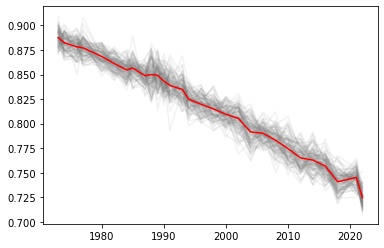

In [230]:
#counterfactual if the same cohort surveyed every year, showing period effect only
for i in range(counter_ys2.shape[0]):
    counterfactual2['pp'] = counter_ys2[i]
    tmp_2 = counterfactual2.groupby('YEAR')['pp'].mean().reset_index()

    plt.plot(tmp_2.YEAR, tmp_2.pp, color='gray', alpha=0.1)
counterfactual2['pp_mean'] = counter_ys2.mean(axis=0)
cgrouped2 = counterfactual2.groupby('YEAR')['pp_mean'].mean().reset_index()
plt.plot(cgrouped2.YEAR, cgrouped2.pp_mean, color='red')
plt.show()
    

### Putting it all together!

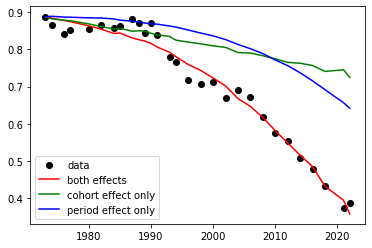

In [233]:
plt.scatter(dfgrouped.YEAR,dfgrouped.homo_wrong, color='black', marker='o', label='data')
plt.plot(dfgrouped.YEAR,dfgrouped.postp_means, color='red', label='both effects')
plt.plot(cgrouped2.YEAR, cgrouped2.pp_mean, color='green', label='cohort effect only')
plt.plot(cgrouped.YEAR, cgrouped.pp_mean, color='blue', label='period effect only')
plt.legend()
plt.show()